# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [80]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [103]:
# Read the Mapbox API key

map_box_api = 'pk.eyJ1IjoicmFoZWVsMTIzNDUiLCJhIjoiY2t1bGs1dmN0M2l5eTJ3cTY2MGF3eXlnMSJ9.0TL-7ot9LOLneEJKBG309w'



## Load Data

In [82]:
# Read the census data into a Pandas DataFrame
# Providing the path of the csv file and reading the file.
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [83]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# Finding the mean of housing units per year by grouping data.
dataframe_house_unit = sfo_data["housing_units"].groupby(sfo_data.index).mean()


In [84]:
# Save the dataframe as a csv file
# Saving the dataframe into the csv file.
dataframe_house_unit.to_csv('Data/housing_per_year.csv', header=False)

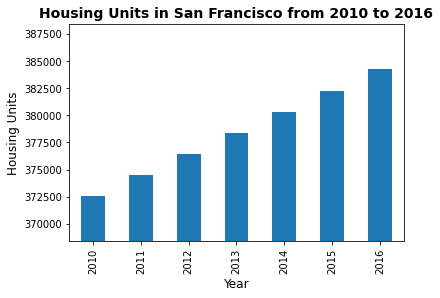

In [85]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# Plotting the average housing unit per year using bar plot.
figure_house_units = plt.figure()
plot_house_units = dataframe_house_unit.plot.bar()
plot_house_units.set_xlabel("Year", fontsize=12)
plot_house_units.set_ylabel("Housing Units", fontsize=12)
plot_house_units.set_title(
    "Housing Units in San Francisco from 2010 to 2016", fontsize=14, fontweight="bold"
)

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
house_unit_std = dataframe_house_unit.std()
minimum_house_unit = min(dataframe_house_unit)
Maximum_house_unit= max(dataframe_house_unit)

plot_house_units.set_ylim(
    minimum_house_unit - house_unit_std, Maximum_house_unit+ house_unit_std
)
plt.show()
plt.close(figure_house_units)

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [86]:
# Calculate the average sale price per square foot and average gross rent
# Calaculating the average sales price per year and the average gross rent per year and extracting sale_price_sqr_foot and gross_rent columns from census dataframe.
dataframe_avg_costs = (
    sfo_data[["sale_price_sqr_foot", "gross_rent"]]
    .groupby(sfo_data.index)
    .mean()
)
dataframe_avg_costs

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239.0
2011,341.903429,1530.0
2012,399.389968,2324.0
2013,483.600304,2971.0
2014,556.277273,3528.0
2015,632.540352,3739.0
2016,697.643709,4390.0


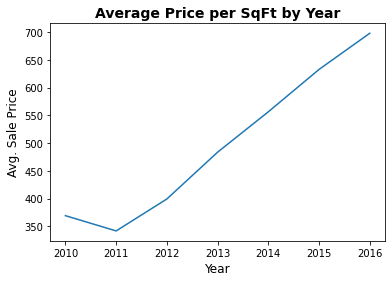

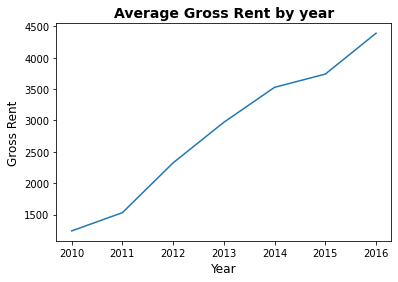

In [87]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent
# Line chart for average sale price per square foot
# Plotting the line chart for average peice per square feet by year.
fig_avg_sale_price = plt.figure()
plot_average_sale = dataframe_avg_costs["sale_price_sqr_foot"].plot()
plot_average_sale.set_xlabel("Year", fontsize=12)
plot_average_sale.set_ylabel("Avg. Sale Price", fontsize=12)
plot_average_sale.set_title(
    "Average Price per SqFt by Year",
    fontsize=14,
    fontweight="bold",
)
plt.show()
plt.close(fig_avg_sale_price)


# Line chart for average montly rent
# Plotting the line chart for average gross rent by year.
fig_avg_gross_rent = plt.figure()
plot_average_rent = dataframe_avg_costs["gross_rent"].plot()
plot_average_rent.set_xlabel("Year", fontsize=12)
plot_average_rent.set_ylabel("Gross Rent", fontsize=12)
plot_average_rent.set_title(
    "Average Gross Rent by year", fontsize=14, fontweight="bold"
)
plt.show()
plt.close(fig_avg_gross_rent)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [88]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# Grouping data on the basis of year and neighborhood and then finding the mean values and creating it's dataframe.
dataframe_cost = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
dataframe_cost.reset_index(inplace=True)
dataframe_cost.rename(columns={"level_0": "year"}, inplace=True)
dataframe_cost.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560.0,1239.0
1,2010,Anza Vista,267.932583,372560.0,1239.0
2,2010,Bayview,170.098665,372560.0,1239.0
3,2010,Buena Vista Park,347.394919,372560.0,1239.0
4,2010,Central Richmond,319.027623,372560.0,1239.0
5,2010,Central Sunset,418.172493,372560.0,1239.0
6,2010,Corona Heights,369.359338,372560.0,1239.0
7,2010,Cow Hollow,569.379968,372560.0,1239.0
8,2010,Croker Amazon,165.645730,372560.0,1239.0
9,2010,Diamond Heights,456.930822,372560.0,1239.0


In [89]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# Creating the line chart of average price per sq ft with neighborhood selector dropdown.
dataframe_cost.hvplot.line(
    "year",
    "sale_price_sqr_foot",
    xlabel="Year",
    ylabel="Avg. Sale Price per Square Foot",
    groupby="neighborhood",
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'2fe95e4a-2a93-4a02-9eb1-6eb83feb1feb': {'defs': …

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [90]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
# Creating the line chart of average monthly rent with neighborhood selector dropdown.
dataframe_cost.hvplot.line(
    "year",
    "gross_rent",
    xlabel="Year",
    ylabel="Avg. monthly rent",
    groupby="neighborhood",
)


BokehModel(combine_events=True, render_bundle={'docs_json': {'6af29677-0a5b-46ce-9a2a-53430481e49f': {'defs': …

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [91]:
# Getting the data from the top 10 expensive neighborhoods to own
# Grouping the data on the basis of neighborhood and finding it;s mean and sort the values.
dataframe_exp_neighbor = sfo_data.groupby(by="neighborhood").mean()
dataframe_exp_neighbor = dataframe_exp_neighbor.sort_values(
    by="sale_price_sqr_foot", ascending=False
).head(10)
dataframe_exp_neighbor = dataframe_exp_neighbor.reset_index()
dataframe_exp_neighbor

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [92]:
# Plotting the data from the top 10 expensive neighborhoods
# Making the bar plot of top 10 expensive neighborhoods.
dataframe_exp_neighbor.hvplot.bar(
    "neighborhood",
    "sale_price_sqr_foot",
    title="Top 10 Expensive Neighborhoods in SFO",
    xlabel="Neighborhood",
    ylabel="Avg. Sale Price per Square Foot",
    height=400,
    rot=90
)

:Bars   [neighborhood]   (sale_price_sqr_foot)

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

- - - 

In [93]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
# YOUR CODE HERE!
dataframe_cost = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
dataframe_cost.reset_index(inplace=True)
dataframe_cost.rename(columns={"level_0": "year"}, inplace=True)
dataframe_cost.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560.0,1239.0
1,2010,Anza Vista,267.932583,372560.0,1239.0
2,2010,Bayview,170.098665,372560.0,1239.0
3,2010,Buena Vista Park,347.394919,372560.0,1239.0
4,2010,Central Richmond,319.027623,372560.0,1239.0
5,2010,Central Sunset,418.172493,372560.0,1239.0
6,2010,Corona Heights,369.359338,372560.0,1239.0
7,2010,Cow Hollow,569.379968,372560.0,1239.0
8,2010,Croker Amazon,165.645730,372560.0,1239.0
9,2010,Diamond Heights,456.930822,372560.0,1239.0


In [94]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
bar1 = dataframe_cost.hvplot(
                        y=["gross_rent", "sale_price_sqr_foot"],
                        kind="bar",
                        height=400, width=800,
                        
                        ylabel="gross_rent sale_price_sqr_foot",
                        title="top 10 expensive neighborhoods", )
bar1

:Bars   [index,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [95]:
# Load neighborhoods coordinates data
# Giving the file path and read the file.
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [96]:
# Calculate the mean values for each neighborhood
# Calculating the mean values fro every neighborhood by grouping the data on the basis of neighborhood. 
dataframe_all_neighbor = sfo_data.groupby(by="neighborhood").mean()
dataframe_all_neighbor.reset_index(inplace=True)
dataframe_all_neighbor.rename(columns={"neighborhood": "Neighborhood"}, inplace=True)
dataframe_all_neighbor.head()

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [97]:
# Join the average values with the neighborhood locations
dataframe_all_neighbor = pd.merge(
    df_neighborhood_locations, dataframe_all_neighbor, on="Neighborhood"
)
dataframe_all_neighbor.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [98]:
# Set the mapbox access token
# YOUR CODE HERE!
px.set_mapbox_access_token(map_box_api)
# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!
map = px.scatter_mapbox(
        dataframe_all_neighbor,
        lat="Lat",
        lon="Lon",
        size="sale_price_sqr_foot",
        color="gross_rent",
        color_continuous_scale=px.colors.cyclical.IceFire,
        size_max=15,
        zoom=11,
        hover_name="Neighborhood",
        title="Averange Sale Price Per Square Foot and Gross Rent in San Francisco",
    )
map.show()


- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [99]:
# Fetch the data from all expensive neighborhoods per year.
dataframe_exp_neighbor_per_year = dataframe_cost[dataframe_cost["neighborhood"].isin(dataframe_exp_neighbor["neighborhood"])]
dataframe_exp_neighbor_per_year.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560.0,1239.0
31,2010,Miraloma Park,680.608729,372560.0,1239.0
41,2010,Pacific Heights,496.516014,372560.0,1239.0
46,2010,Potrero Hill,491.450004,372560.0,1239.0
47,2010,Presidio Heights,549.417931,372560.0,1239.0


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


In [100]:
# Parallel Categories Plot
# YOUR CODE HERE!
top_expensive = sfo_data.groupby(by="neighborhood").mean()
top_expensive= dataframe_exp_neighbor_per_year.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
top_expensive = top_expensive.reset_index()

parallel_categories = px.parallel_categories(top_expensive,
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
)
parallel_categories

In [101]:
# Parallel Coordinates Plot
# YOUR CODE HERE!
top_expensiv = sfo_data.groupby(by="neighborhood").mean()
top_expensive= dataframe_exp_neighbor_per_year.sort_values(
by="sale_price_sqr_foot", ascending=False).head(10)
top_expensive = top_expensive.reset_index()

parallel_coordinates = px.parallel_coordinates(
    top_expensive,
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
)
parallel_coordinates

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [102]:
# Sunburst Plot
# YOUR CODE HERE!
fig = px.sunburst(dataframe_exp_neighbor_per_year, path=[dataframe_exp_neighbor_per_year["year"], dataframe_exp_neighbor_per_year["neighborhood"]], values=dataframe_exp_neighbor_per_year['gross_rent'],
                  color=dataframe_exp_neighbor_per_year['gross_rent'], 
                 
                  color_continuous_midpoint=np.average(dataframe_exp_neighbor_per_year['gross_rent'], weights=dataframe_exp_neighbor_per_year['gross_rent']))
fig.show()